## Install & Import Statements
Import: See the inline comments for a brief rational of each library.

Notes: The SPARQLWrapper libary provides tools for querying SPARQL endpoints. The sparql_dataframe library can be used with SPARQLWrapper to convert JSON results from a SPARQL query directly to a Pandas dataframe. The mapclassify library is required by GeoPandas for its .explore functionality.

In [1]:
from branca.element import Figure                                  # For controlling the size of the final map
import folium                                                      # For map layer control
import geopandas as gpd                                            # For geospatial dataframes
import pandas as pd                                                # For dataframes
from shapely import wkt                                            # For working with WKT coordinates in a GeoDataFrame
from SPARQLWrapper import SPARQLWrapper, JSON, GET, POST, DIGEST   # For querying SPARQL endpoints
import sparql_dataframe                                            # For converting SPARQL query results to Pandas dataframes
from rdflib import Graph
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import cycle

## Variable Initialization
A SPARQLWrapper is created to access the SAWGraph repository for the SAWGraph project.

In [2]:
%%capture
pd.options.display.width = 240
endpointPOST = 'http://Shirlys-MacBook-Pro.local:7200/repositories/gbif'
sparqlPOST = SPARQLWrapper(endpointPOST)

## Queries

These queries directly access data in Salmon Knowledge Graph that houses the GBIF, Streamnet results. They use federation to access additional data in KWG repositories.


The query is executed and returned as a dataframe.

In [ ]:
query1="""
PREFIX time: <http://www.w3.org/2006/time#>
PREFIX fish-ont: <http://purl.dataone.org/fish-ont/>
PREFIX prov-o: <https://www.w3.org/TR/prov-o/>
PREFIX geo: <http://www.opengis.net/ont/geosparql#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX streamnet-ont: <https://knb.ecoinformatics.org/knb/streamnet/lod/ontology/>
PREFIX nosa-ont: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/ontology/>
PREFIX nosar: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/resource/>
PREFIX gbif-ont: <https://knb.ecoinformatics.org/knb/gbif/lod/ontology/>
PREFIX gbifr: <https://knb.ecoinformatics.org/knb/gbif/lod/resource/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?month ?wkt (COUNT(?gbif_obs) AS ?recordCount) (SUM(?value) AS ?presence)
WHERE {
    ?gbif_obs_coll a gbif-ont:ObservationCollection;
    		fish-ont:hasTemporalContext ?time.
    ?gbif_obs_coll sosa:hasMember ?gbif_obs.
    ?gbif_obs sosa:hasSimpleResult ?value;
    		sosa:observedProperty gbif-ont:salmonAbundance.OCCURRENCE_VALUE;
    		sosa:hasFeatureOfInterest ?obs_point.
   
    ?obs_point geo:hasGeometry ?geo;
    		fish-ont:locatedIn gbifr:river.bresle-river.
	?geo geo:hasGeometry|geo:asWKT ?wkt.
    ?time xsd:inXSDgYear ?year;
    	xsd:inXSDDate ?date;
    	xsd:inXSDgMonth ?month.
  
    FILTER  (?year = "2007"^^xsd:gYear) 
}
GROUP BY ?wkt ?month
ORDER BY ?wkt ?month
"""
sparqlPOST.setQuery(query1)
sparqlPOST.setReturnFormat(JSON)

try:
    # results = sparqlPOST.query().convert()
    # for result in results["results"]["bindings"]:
    #     print(result)
    df = sparql_dataframe.get(endpointPOST, query1)
    # print(df)
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: name 'query' is not defined


In [235]:
query2="""
PREFIX time: <http://www.w3.org/2006/time#>
PREFIX fish-ont: <http://purl.dataone.org/fish-ont/>
PREFIX prov-o: <https://www.w3.org/TR/prov-o/>
PREFIX geo: <http://www.opengis.net/ont/geosparql#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX streamnet-ont: <https://knb.ecoinformatics.org/knb/streamnet/lod/ontology/>
PREFIX nosa-ont: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/ontology/>
PREFIX nosar: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/resource/>
PREFIX gbif-ont: <https://knb.ecoinformatics.org/knb/gbif/lod/ontology/>
PREFIX gbifr: <https://knb.ecoinformatics.org/knb/gbif/lod/resource/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?month (COUNT(?gbif_obs) AS ?recordCount) (SUM(?value) AS ?presence)
WHERE {
    ?gbif_obs_coll a gbif-ont:ObservationCollection;
    		fish-ont:hasTemporalContext ?time.
    ?gbif_obs_coll sosa:hasMember ?gbif_obs.
    ?gbif_obs sosa:hasSimpleResult ?value;
    		sosa:observedProperty gbif-ont:salmonAbundance.OCCURRENCE_VALUE;
    		sosa:hasFeatureOfInterest ?obs_point.
   
    ?obs_point geo:hasGeometry ?geo;
    		fish-ont:locatedIn gbifr:river.bresle-river.
	?geo geo:hasGeometry|geo:asWKT ?wkt.
    ?time xsd:inXSDgYear ?year;
    	xsd:inXSDDate ?date;
    	xsd:inXSDgMonth ?month. 
    FILTER  (?year = "2023"^^xsd:gYear) 
}
GROUP BY ?river ?month
ORDER BY ASC(?month)
"""
sparqlPOST.setQuery(query2)
sparqlPOST.setReturnFormat(JSON)

try:
    # results = sparqlPOST.query().convert()
    # for result in results["results"]["bindings"]:
    #     print(result)
    bresle_df = sparql_dataframe.get(endpointPOST, query2)
    # print(bresle_df)
except Exception as e:
    print(f"An error occurred: {e}")


bresle_df= bresle_df[['month', 'recordCount', 'presence']]

In [236]:
query3="""
PREFIX time: <http://www.w3.org/2006/time#>
PREFIX fish-ont: <http://purl.dataone.org/fish-ont/>
PREFIX prov-o: <https://www.w3.org/TR/prov-o/>
PREFIX geo: <http://www.opengis.net/ont/geosparql#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX streamnet-ont: <https://knb.ecoinformatics.org/knb/streamnet/lod/ontology/>
PREFIX nosa-ont: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/ontology/>
PREFIX nosar: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/resource/>
PREFIX gbif-ont: <https://knb.ecoinformatics.org/knb/gbif/lod/ontology/>
PREFIX gbifr: <https://knb.ecoinformatics.org/knb/gbif/lod/resource/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?month (COUNT(?gbif_obs) AS ?recordCount) (SUM(?value) AS ?presence)
WHERE {
    ?gbif_obs_coll a gbif-ont:ObservationCollection;
    		fish-ont:hasTemporalContext ?time.
    ?gbif_obs_coll sosa:hasMember ?gbif_obs.
    ?gbif_obs sosa:hasSimpleResult ?value;
    		sosa:observedProperty gbif-ont:salmonAbundance.OCCURRENCE_VALUE;
    		sosa:hasFeatureOfInterest ?obs_point.
   
    ?obs_point geo:hasGeometry ?geo;
    		fish-ont:locatedIn gbifr:river.nivelle-river.
	?geo geo:hasGeometry|geo:asWKT ?wkt.
    ?time xsd:inXSDgYear ?year;
    	xsd:inXSDDate ?date;
    	xsd:inXSDgMonth ?month. 
    FILTER  (?year = "2023"^^xsd:gYear) 
}
GROUP BY ?river ?month
ORDER BY ASC(?month)
"""
sparqlPOST.setQuery(query3)
sparqlPOST.setReturnFormat(JSON)

try:
    # results = sparqlPOST.query().convert()
    # for result in results["results"]["bindings"]:
    #     print(result)
    nivelle_df = sparql_dataframe.get(endpointPOST, query3)
    # print(nivelle_df)
except Exception as e:
    print(f"An error occurred: {e}")


nivelle_df= nivelle_df[['month', 'recordCount', 'presence']]

In [237]:
query4="""
PREFIX time: <http://www.w3.org/2006/time#>
PREFIX fish-ont: <http://purl.dataone.org/fish-ont/>
PREFIX prov-o: <https://www.w3.org/TR/prov-o/>
PREFIX geo: <http://www.opengis.net/ont/geosparql#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX streamnet-ont: <https://knb.ecoinformatics.org/knb/streamnet/lod/ontology/>
PREFIX nosa-ont: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/ontology/>
PREFIX nosar: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/resource/>
PREFIX gbif-ont: <https://knb.ecoinformatics.org/knb/gbif/lod/ontology/>
PREFIX gbifr: <https://knb.ecoinformatics.org/knb/gbif/lod/resource/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?month (COUNT(?gbif_obs) AS ?recordCount) (SUM(?value) AS ?presence)
WHERE {
    ?gbif_obs_coll a gbif-ont:ObservationCollection;
    		fish-ont:hasTemporalContext ?time.
    ?gbif_obs_coll sosa:hasMember ?gbif_obs.
    ?gbif_obs sosa:hasSimpleResult ?value;
    		sosa:observedProperty gbif-ont:salmonAbundance.OCCURRENCE_VALUE;
    		sosa:hasFeatureOfInterest ?obs_point.
   
    ?obs_point geo:hasGeometry ?geo;
    		fish-ont:locatedIn gbifr:river.oir-river.
	?geo geo:hasGeometry|geo:asWKT ?wkt.
    ?time xsd:inXSDgYear ?year;
    	xsd:inXSDDate ?date;
    	xsd:inXSDgMonth ?month. 
    FILTER  (?year = "2023"^^xsd:gYear) 
}
GROUP BY ?river ?month
ORDER BY ASC(?month)
"""
sparqlPOST.setQuery(query4)
sparqlPOST.setReturnFormat(JSON)

try:
    # results = sparqlPOST.query().convert()
    # for result in results["results"]["bindings"]:
    #     print(result)
    oir_df = sparql_dataframe.get(endpointPOST, query4)
    # print(oir_df)
except Exception as e:
    print(f"An error occurred: {e}")


oir_df= oir_df[['month', 'recordCount', 'presence']]

In [238]:
query5="""
PREFIX time: <http://www.w3.org/2006/time#>
PREFIX fish-ont: <http://purl.dataone.org/fish-ont/>
PREFIX prov-o: <https://www.w3.org/TR/prov-o/>
PREFIX geo: <http://www.opengis.net/ont/geosparql#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX streamnet-ont: <https://knb.ecoinformatics.org/knb/streamnet/lod/ontology/>
PREFIX nosa-ont: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/ontology/>
PREFIX nosar: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/resource/>
PREFIX gbif-ont: <https://knb.ecoinformatics.org/knb/gbif/lod/ontology/>
PREFIX gbifr: <https://knb.ecoinformatics.org/knb/gbif/lod/resource/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?month (COUNT(?gbif_obs) AS ?recordCount) (SUM(?value) AS ?presence)
WHERE {
    ?gbif_obs_coll a gbif-ont:ObservationCollection;
    		fish-ont:hasTemporalContext ?time.
    ?gbif_obs_coll sosa:hasMember ?gbif_obs.
    ?gbif_obs sosa:hasSimpleResult ?value;
    		sosa:observedProperty gbif-ont:salmonAbundance.OCCURRENCE_VALUE;
    		sosa:hasFeatureOfInterest ?obs_point.
   
    ?obs_point geo:hasGeometry ?geo;
    		fish-ont:locatedIn gbifr:river.scorff-river.
	?geo geo:hasGeometry|geo:asWKT ?wkt.
    ?time xsd:inXSDgYear ?year;
    	xsd:inXSDDate ?date;
    	xsd:inXSDgMonth ?month. 
    FILTER  (?year = "2023"^^xsd:gYear) 
}
GROUP BY ?river ?month
ORDER BY ASC(?month)
"""
sparqlPOST.setQuery(query5)
sparqlPOST.setReturnFormat(JSON)

try:
    # results = sparqlPOST.query().convert()
    # for result in results["results"]["bindings"]:
    #     print(result)
    scorff_df = sparql_dataframe.get(endpointPOST, query5)
    # print(scorff_df)
except Exception as e:
    print(f"An error occurred: {e}")


scorff_df= scorff_df[['month', 'recordCount', 'presence']]

In [249]:
query6="""
PREFIX time: <http://www.w3.org/2006/time#>
PREFIX fish-ont: <http://purl.dataone.org/fish-ont/>
PREFIX prov-o: <https://www.w3.org/TR/prov-o/>
PREFIX geo: <http://www.opengis.net/ont/geosparql#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX streamnet-ont: <https://knb.ecoinformatics.org/knb/streamnet/lod/ontology/>
PREFIX nosa-ont: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/ontology/>
PREFIX nosar: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/resource/>
PREFIX gbif-ont: <https://knb.ecoinformatics.org/knb/gbif/lod/ontology/>
PREFIX gbifr: <https://knb.ecoinformatics.org/knb/gbif/lod/resource/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?month (COUNT(?gbif_obs) AS ?recordCount) (SUM(?value) AS ?presence)
WHERE {
    ?gbif_obs_coll a gbif-ont:ObservationCollection;
    		fish-ont:hasTemporalContext ?time.
    ?gbif_obs_coll sosa:hasMember ?gbif_obs.
    ?gbif_obs sosa:hasSimpleResult ?value;
    		sosa:observedProperty gbif-ont:salmonAbundance.OCCURRENCE_VALUE;
    		sosa:hasFeatureOfInterest ?obs_point.
   
    ?obs_point geo:hasGeometry ?geo;
    		fish-ont:locatedIn gbifr:river.bresle-river.
	?geo geo:hasGeometry|geo:asWKT ?wkt.
    ?time xsd:inXSDgYear ?year;
    	xsd:inXSDDate ?date;
    	xsd:inXSDgMonth ?month. 
    FILTER  (?year = "2022"^^xsd:gYear) 
}
GROUP BY ?river ?month
ORDER BY ASC(?month)
"""
sparqlPOST.setQuery(query6)
sparqlPOST.setReturnFormat(JSON)

try:
    # results = sparqlPOST.query().convert()
    # for result in results["results"]["bindings"]:
    #     print(result)
    bresle_df2 = sparql_dataframe.get(endpointPOST, query6)
    # print(bresle_df)
except Exception as e:
    print(f"An error occurred: {e}")


bresle_df2= bresle_df2[['month', 'recordCount', 'presence']]

query7="""
PREFIX time: <http://www.w3.org/2006/time#>
PREFIX fish-ont: <http://purl.dataone.org/fish-ont/>
PREFIX prov-o: <https://www.w3.org/TR/prov-o/>
PREFIX geo: <http://www.opengis.net/ont/geosparql#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX streamnet-ont: <https://knb.ecoinformatics.org/knb/streamnet/lod/ontology/>
PREFIX nosa-ont: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/ontology/>
PREFIX nosar: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/resource/>
PREFIX gbif-ont: <https://knb.ecoinformatics.org/knb/gbif/lod/ontology/>
PREFIX gbifr: <https://knb.ecoinformatics.org/knb/gbif/lod/resource/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?month (COUNT(?gbif_obs) AS ?recordCount) (SUM(?value) AS ?presence)
WHERE {
    ?gbif_obs_coll a gbif-ont:ObservationCollection;
    		fish-ont:hasTemporalContext ?time.
    ?gbif_obs_coll sosa:hasMember ?gbif_obs.
    ?gbif_obs sosa:hasSimpleResult ?value;
    		sosa:observedProperty gbif-ont:salmonAbundance.OCCURRENCE_VALUE;
    		sosa:hasFeatureOfInterest ?obs_point.
   
    ?obs_point geo:hasGeometry ?geo;
    		fish-ont:locatedIn gbifr:river.nivelle-river.
	?geo geo:hasGeometry|geo:asWKT ?wkt.
    ?time xsd:inXSDgYear ?year;
    	xsd:inXSDDate ?date;
    	xsd:inXSDgMonth ?month. 
    FILTER  (?year = "2022"^^xsd:gYear) 
}
GROUP BY ?river ?month
ORDER BY ASC(?month)
"""
sparqlPOST.setQuery(query7)
sparqlPOST.setReturnFormat(JSON)

try:
    # results = sparqlPOST.query().convert()
    # for result in results["results"]["bindings"]:
    #     print(result)
    nivelle_df2 = sparql_dataframe.get(endpointPOST, query7)
    # print(nivelle_df)
except Exception as e:
    print(f"An error occurred: {e}")


nivelle_df2= nivelle_df2[['month', 'recordCount', 'presence']]

query8="""
PREFIX time: <http://www.w3.org/2006/time#>
PREFIX fish-ont: <http://purl.dataone.org/fish-ont/>
PREFIX prov-o: <https://www.w3.org/TR/prov-o/>
PREFIX geo: <http://www.opengis.net/ont/geosparql#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX streamnet-ont: <https://knb.ecoinformatics.org/knb/streamnet/lod/ontology/>
PREFIX nosa-ont: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/ontology/>
PREFIX nosar: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/resource/>
PREFIX gbif-ont: <https://knb.ecoinformatics.org/knb/gbif/lod/ontology/>
PREFIX gbifr: <https://knb.ecoinformatics.org/knb/gbif/lod/resource/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?month (COUNT(?gbif_obs) AS ?recordCount) (SUM(?value) AS ?presence)
WHERE {
    ?gbif_obs_coll a gbif-ont:ObservationCollection;
    		fish-ont:hasTemporalContext ?time.
    ?gbif_obs_coll sosa:hasMember ?gbif_obs.
    ?gbif_obs sosa:hasSimpleResult ?value;
    		sosa:observedProperty gbif-ont:salmonAbundance.OCCURRENCE_VALUE;
    		sosa:hasFeatureOfInterest ?obs_point.
   
    ?obs_point geo:hasGeometry ?geo;
    		fish-ont:locatedIn gbifr:river.oir-river.
	?geo geo:hasGeometry|geo:asWKT ?wkt.
    ?time xsd:inXSDgYear ?year;
    	xsd:inXSDDate ?date;
    	xsd:inXSDgMonth ?month. 
    FILTER  (?year = "2022"^^xsd:gYear) 
}
GROUP BY ?river ?month
ORDER BY ASC(?month)
"""
sparqlPOST.setQuery(query8)
sparqlPOST.setReturnFormat(JSON)

try:
    # results = sparqlPOST.query().convert()
    # for result in results["results"]["bindings"]:
    #     print(result)
    oir_df2 = sparql_dataframe.get(endpointPOST, query8)
    # print(oir_df)
except Exception as e:
    print(f"An error occurred: {e}")


oir_df2= oir_df2[['month', 'recordCount', 'presence']]

query9="""
PREFIX time: <http://www.w3.org/2006/time#>
PREFIX fish-ont: <http://purl.dataone.org/fish-ont/>
PREFIX prov-o: <https://www.w3.org/TR/prov-o/>
PREFIX geo: <http://www.opengis.net/ont/geosparql#>
PREFIX sosa: <http://www.w3.org/ns/sosa/>
PREFIX streamnet-ont: <https://knb.ecoinformatics.org/knb/streamnet/lod/ontology/>
PREFIX nosa-ont: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/ontology/>
PREFIX nosar: <https://knb.ecoinformatics.org/knb/streamnet/nosa/lod/resource/>
PREFIX gbif-ont: <https://knb.ecoinformatics.org/knb/gbif/lod/ontology/>
PREFIX gbifr: <https://knb.ecoinformatics.org/knb/gbif/lod/resource/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?month (COUNT(?gbif_obs) AS ?recordCount) (SUM(?value) AS ?presence)
WHERE {
    ?gbif_obs_coll a gbif-ont:ObservationCollection;
    		fish-ont:hasTemporalContext ?time.
    ?gbif_obs_coll sosa:hasMember ?gbif_obs.
    ?gbif_obs sosa:hasSimpleResult ?value;
    		sosa:observedProperty gbif-ont:salmonAbundance.OCCURRENCE_VALUE;
    		sosa:hasFeatureOfInterest ?obs_point.
   
    ?obs_point geo:hasGeometry ?geo;
    		fish-ont:locatedIn gbifr:river.scorff-river.
	?geo geo:hasGeometry|geo:asWKT ?wkt.
    ?time xsd:inXSDgYear ?year;
    	xsd:inXSDDate ?date;
    	xsd:inXSDgMonth ?month. 
    FILTER  (?year = "2022"^^xsd:gYear) 
}
GROUP BY ?river ?month
ORDER BY ASC(?month)
"""
sparqlPOST.setQuery(query9)
sparqlPOST.setReturnFormat(JSON)

try:
    # results = sparqlPOST.query().convert()
    # for result in results["results"]["bindings"]:
    #     print(result)
    scorff_df2 = sparql_dataframe.get(endpointPOST, query9)
    # print(scorff_df)
except Exception as e:
    print(f"An error occurred: {e}")


scorff_df2= scorff_df2[['month', 'recordCount', 'presence']]

## Visualizing on a map

**bold text**## Create GeoPandas dataframes for mapping

Convert the above dataframes to GeoDataFrames, setting the WKT columns as the geometry columns and setting the CRS to WGS 84.

In [239]:
df['wkt'] = df['wkt'].apply(wkt.loads)
gbif_abundance_df= df[['month', 'wkt', 'recordCount', 'presence']]



In [240]:
%%capture
gbif_abundance_gdf = gpd.GeoDataFrame(gbif_abundance_df, geometry='wkt')
gbif_abundance_gdf.set_crs(epsg=4326, inplace=True, allow_override=True)

# Visualizing on a map

## Create map with multiple layers

Each GeoDataFrame is a layer in the final map.

In [83]:
from folium.plugins import MarkerCluster
from folium import CircleMarker

In [64]:
#%%capture
fac_color = 'black'
boundweight = 5

map = gbif_abundance_gdf.explore(
        style_kwds=dict(weight=boundweight, style_function=lambda x: {"color": "Green" if x['properties']['value']== 'PRESENT' else 'Red'}), #highlight the presence and absence of salmon
                     tooltip=True,
                     name='Salmon Abundance',
                     show=True)
# m = folium.Map(location=[gbif_abundance_gdf.geometry.centroid.y.mean(), 
#                          gbif_abundance_gdf.geometry.centroid.x.mean()], 
#                zoom_start=10)

# for _, row in gbif_abundance_gdf.iterrows():
#     lat, lon = row.wkt.y, row.wkt.x
#     folium.CircleMarker(
#         location=[lat, lon],
#         radius=5,  # Size of the circle
#         color="blue",  # Circle border color
#         fill=True,
#         fill_color="cyan",  # Fill color
#         fill_opacity=0.6,
#         popup=f"Value: {row['value']}, Year: {row['year']}",
#         tooltip=row['obs_point'],
#     ).add_to(m)

## Show map

The map is created inside a Figure box to control its size. This displays the samples sized by the max measured concentration of any PFAs chemical

In [65]:
# map.save('Salmon observation points in Bresle River)

fig = Figure(width=1200, height=800)
fig.add_child(map)

# m

#Plot data

## Example 1: Generate a temporal trend plot
## Static plot of the GeoDataFrame

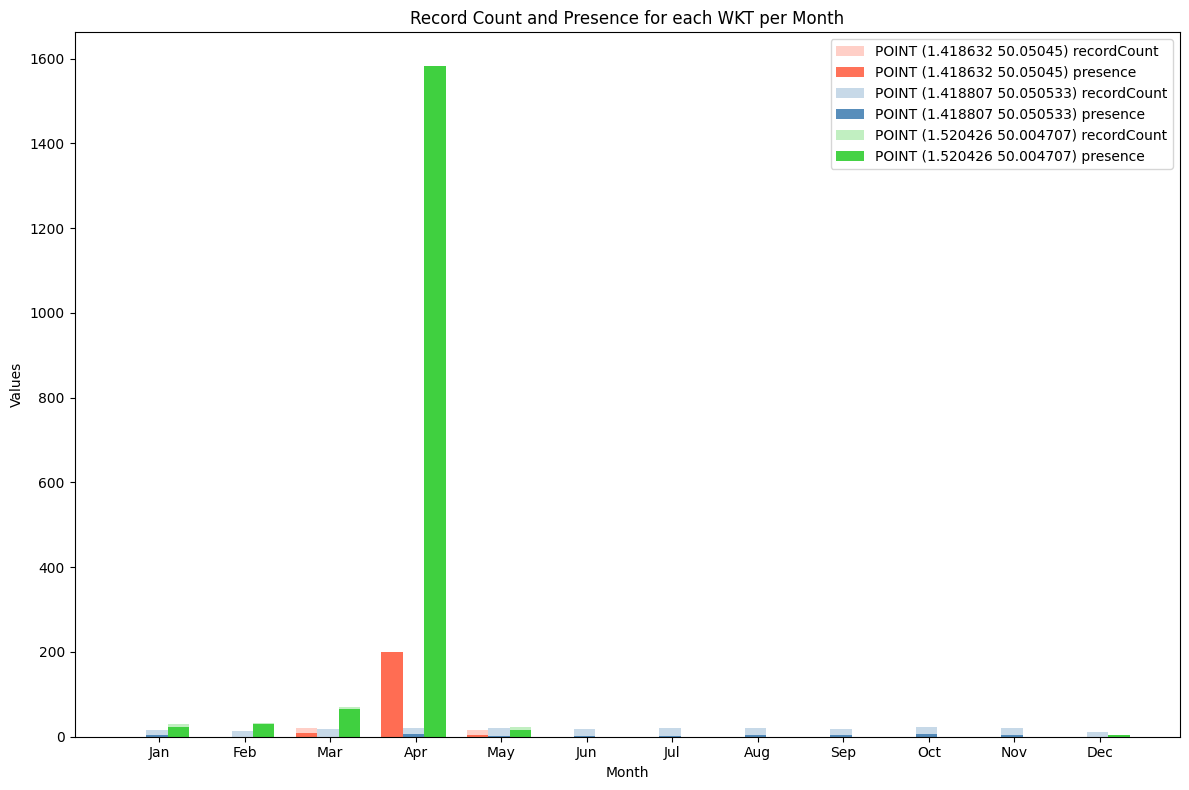

In [ ]:
# Set up the figure for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Get unique months and wkts
months = sorted(gbif_abundance_gdf["month"].unique())

# Get unique wkt locations, but treat as string to avoid geometry sorting errors
wkts = gbif_abundance_gdf['wkt'].apply(lambda x: str(x)).unique()

# Define width for bars
bar_width = 0.25

# Define your custom list of colors for the wkt locations
custom_colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2', '#FF69B4', '#FF4500', '#A52A2A']

# Cycle through the colors to assign one for each wkt
wkt_colors = {wkt: color for wkt, color in zip(wkts, cycle(custom_colors))}

# Initialize an index for each month on the X-axis
index = np.arange(len(months))

# Loop over each wkt (location)
for i, wkt in enumerate(wkts):
    # Filter data by month and wkt
    data = gbif_abundance_gdf[gbif_abundance_gdf['wkt'].apply(lambda x: str(x)) == wkt]
    
    # # Get recordCount and presence values for the current wkt
    recordCount = data.groupby('month')['recordCount'].sum().reindex(months, fill_value=0)
    presence = data.groupby('month')['presence'].sum().reindex(months, fill_value=0)
    
    # Offset for each wkt so that bars don't overlap
    offset = bar_width * i
    
    # # Plot the bars for recordCount (blue) and presence (red)
     # Plot the bars for recordCount and presence (with adjusted transparency)
    ax.bar(index + offset, recordCount, width=bar_width, color=wkt_colors[wkt], alpha=0.3, label=f'{wkt} recordCount')
    ax.bar(index + offset, presence, width=bar_width, color=wkt_colors[wkt], alpha=0.9, label=f'{wkt} presence')


# Set the X-ticks and labels (months)
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(index + bar_width * (len(wkts) / 2) - 0.1)  # Adjust to the center of the bars
ax.set_xticklabels(month_labels[:len(months)])  # Use month names for the labels


# # Add labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Values')
ax.set_title('Record Count and Presence for each WKT per Month')
ax.legend(loc='upper right')

# Remove duplicate legends (for the same wkt location)
# handles, labels = ax.get_legend_handles_labels()
# unique_handles_labels = list(dict(zip(labels, handles)).items())
# ax.legend([handle for handle, _ in unique_handles_labels], [label for _, label in unique_handles_labels], loc='upper right')

# # Show the plot
plt.tight_layout()
plt.show()

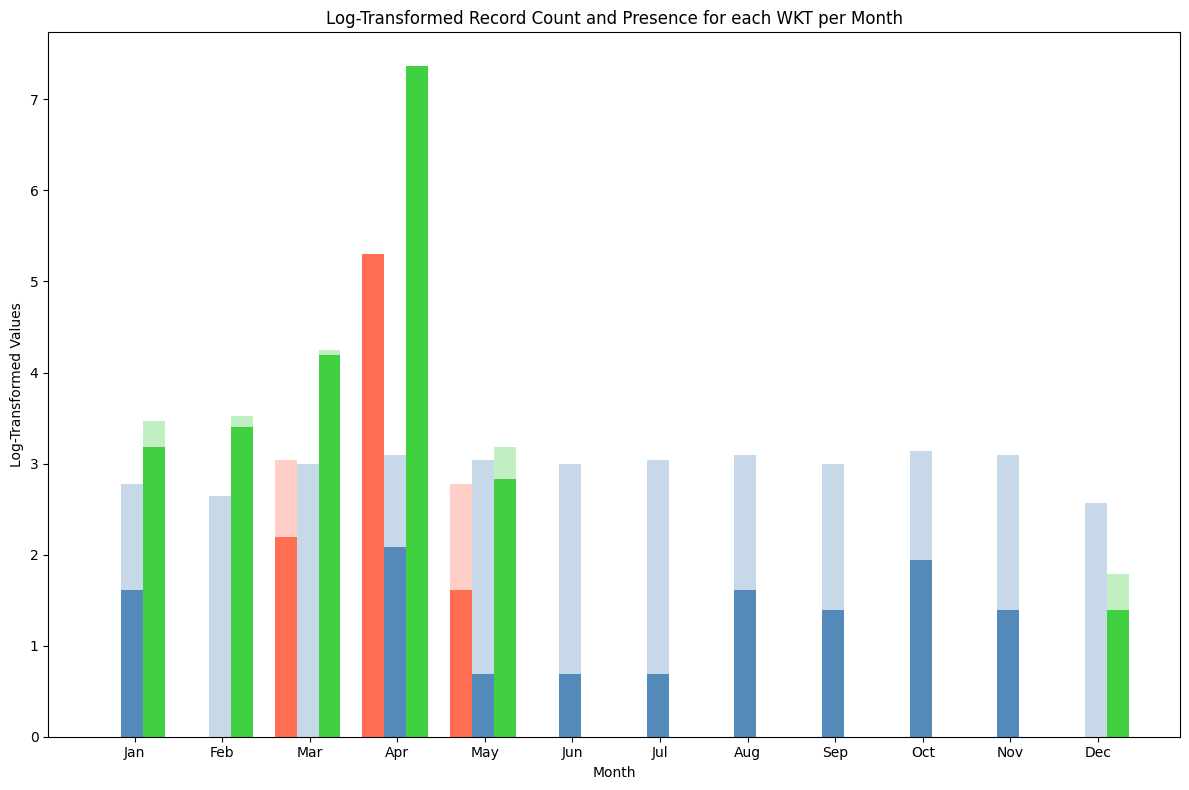

In [ ]:

# Apply logarithmic transformation to 'recordCount' and 'presence' columns in the DataFrame
# Adding 1 to avoid log(0) issues (log1p does log(x + 1))
gbif_abundance_gdf['log_recordCount'] = np.log1p(gbif_abundance_gdf['recordCount'])
gbif_abundance_gdf['log_presence'] = np.log1p(gbif_abundance_gdf['presence'])

# Set up the figure for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Get unique months (1 to 12) and wkts
months = sorted(gbif_abundance_gdf["month"].unique())
wkts = gbif_abundance_gdf['wkt'].apply(lambda x: str(x)).unique()

# Define width for bars
bar_width = 0.25

# Define your custom list of colors for the wkt locations
custom_colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2', '#FF69B4', '#FF4500', '#A52A2A']

# Cycle through the colors to assign one for each wkt
wkt_colors = {wkt: color for wkt, color in zip(wkts, cycle(custom_colors))}

# Initialize an index for each month on the X-axis
index = np.arange(len(months))

# Loop over each wkt (location)
for i, wkt in enumerate(wkts):
    # Filter data by month and wkt
    data = gbif_abundance_gdf[gbif_abundance_gdf['wkt'].apply(lambda x: str(x)) == wkt]
    
    # Group by month and fill missing months with 0s
    log_recordCount = data.groupby('month')['log_recordCount'].sum().reindex(months, fill_value=0)
    log_presence = data.groupby('month')['log_presence'].sum().reindex(months, fill_value=0)
    
    # Offset for each wkt so that bars don't overlap
    offset = bar_width * i
    
    # Plot the bars for log_recordCount and log_presence (with adjusted transparency)
    ax.bar(index + offset, log_recordCount, width=bar_width, color=wkt_colors[wkt], alpha=0.3, label=f'{wkt} recordCount')
    ax.bar(index + offset, log_presence, width=bar_width, color=wkt_colors[wkt], alpha=0.9, label=f'{wkt} presence')

# Set the X-ticks and labels (months)
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(index + bar_width * (len(wkts) / 2) - 0.1)  # Adjust to the center of the bars
ax.set_xticklabels(month_labels[:len(months)])  # Use month names for the labels

# Add labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Log-Transformed Values')
ax.set_title('Log-Transformed Abundance of Salmon at the Bresle River')

# Remove duplicate legends (for the same wkt location)
# handles, labels = ax.get_legend_handles_labels()
# unique_handles_labels = list(dict(zip(labels, handles)).items())
# ax.legend([handle for handle, _ in unique_handles_labels], [label for _, label in unique_handles_labels], loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [250]:

bresle_df= bresle_df[['month', 'recordCount', 'presence']]
nivelle_df= nivelle_df[['month', 'recordCount', 'presence']]
oir_df= oir_df[['month', 'recordCount', 'presence']]
scorff_df= scorff_df[['month', 'recordCount', 'presence']]
# bresle_df
# nivelle_df
# oir_df
# scorff_df
bresle_df2= bresle_df2[['month', 'recordCount', 'presence']]
nivelle_df2= nivelle_df2[['month', 'recordCount', 'presence']]
oir_df2= oir_df2[['month', 'recordCount', 'presence']]
scorff_df2= scorff_df2[['month', 'recordCount', 'presence']]

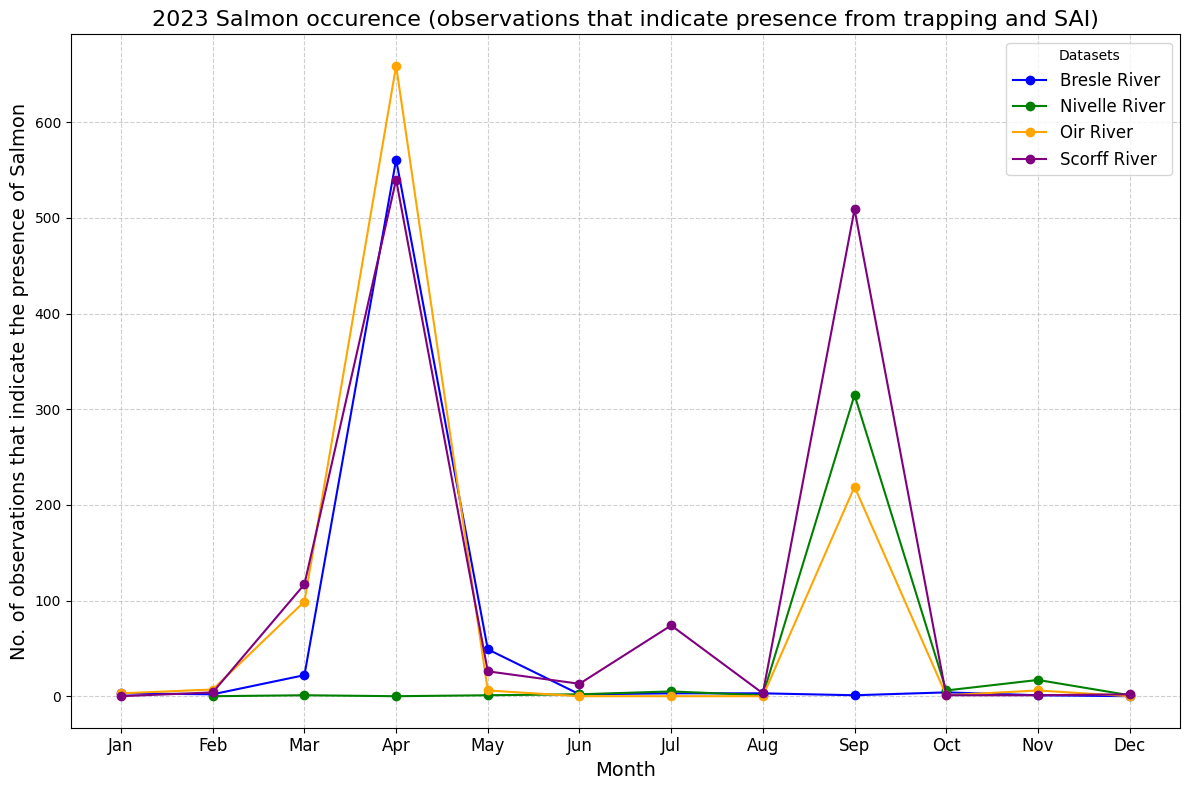

In [258]:
# List of dataframes and corresponding labels
dataframes = [bresle_df, nivelle_df, oir_df, scorff_df]
labels = ["Bresle River", "Nivelle River", "Oir River", "Scorff River"]
labels2 = ["Bresle River TO", "Nivelle River TO", "Oir River TO", "Scorff River TO"]

# Month labels for x-axis
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Sort each dataframe by the 'month' column
dataframes = [df.sort_values(by="month") for df in dataframes]

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Colors for each dataset
colors = ['blue', 'green', 'orange', 'purple']

# Plot each dataframe's presence as a line
for df, label, label2, color in zip(dataframes, labels, labels2, colors):
    ax.plot(df['month'], df['presence'], label=label, color=color, marker='o', linestyle='-')
    # ax.plot(df['month'], df['recordCount'], label=label2, color=color, marker='o', linestyle='--')

# Customize the plot
ax.set_title('2023 Salmon occurence (observations that indicate presence from trapping and SAI)', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('No. of observations that indicate the presence of Salmon', fontsize=14)
ax.set_xticks(range(1, 13))  # Ensure x-axis shows all months (1-12)
ax.set_xticklabels(month_labels, fontsize=12)  # Use month names as labels
ax.legend(title="Datasets", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

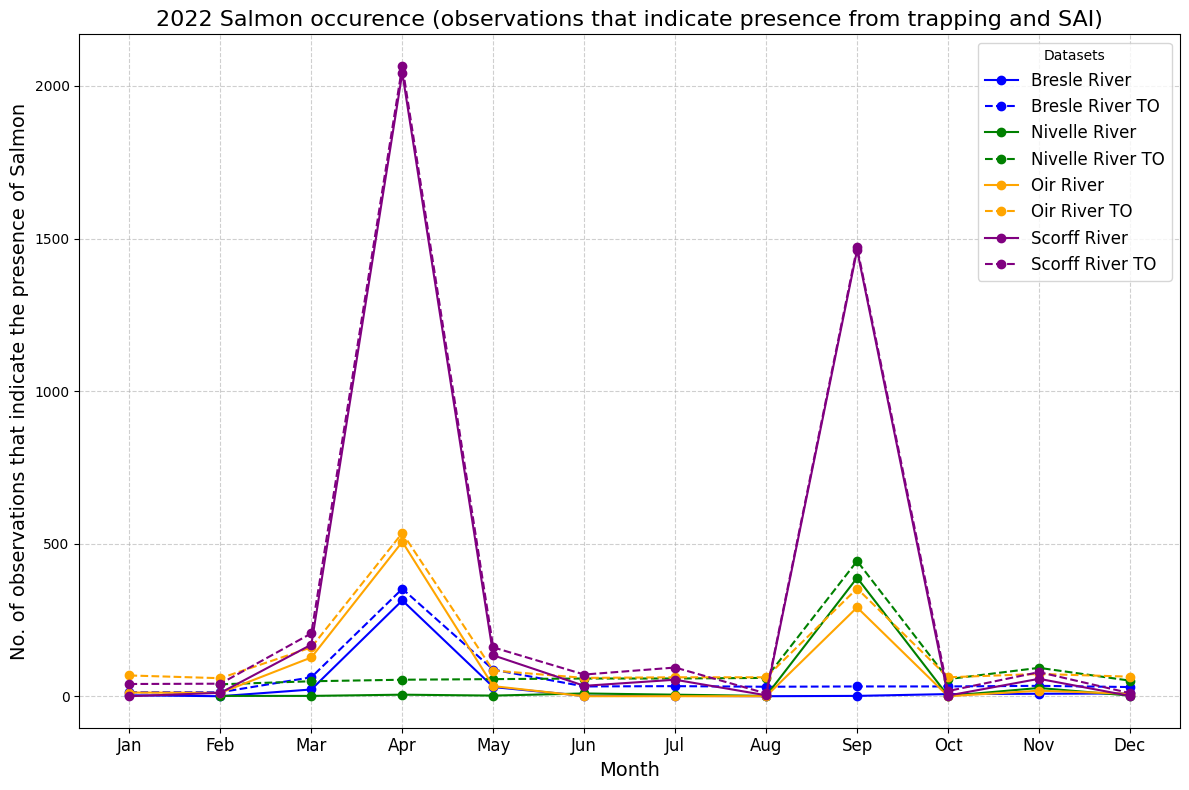

In [ ]:
# List of dataframes and corresponding labels
dataframes = [bresle_df2, nivelle_df2, oir_df2, scorff_df2]
labels = ["Bresle River", "Nivelle River", "Oir River", "Scorff River"]
labels2 = ["Bresle River TO", "Nivelle River TO", "Oir River TO", "Scorff River TO"]

# Month labels for x-axis
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Sort each dataframe by the 'month' column
dataframes = [df.sort_values(by="month") for df in dataframes]

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Colors for each dataset
colors = ['blue', 'green', 'orange', 'purple']

# Plot each dataframe's presence as a line
for df, label, label2, color in zip(dataframes, labels, labels2, colors):
    ax.plot(df['month'], df['presence'], label=label, color=color, marker='o', linestyle='-')
    # ax.plot(df['month'], df['recordCount'], label=label2, color=color, marker='o', linestyle='--')

# Customize the plot
ax.set_title('2022 Salmon occurence (observations that indicate presence from trapping and SAI)', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('No. of observations that indicate the presence of Salmon', fontsize=14)
ax.set_xticks(range(1, 13))  # Ensure x-axis shows all months (1-12)
ax.set_xticklabels(month_labels, fontsize=12)  # Use month names as labels
ax.legend(title="Datasets", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()